In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ==== NLP Libraries ====
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ==== Machine Learning Libraries ====
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download essential NLTK resources (run once, comment out after first run)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set up plot aesthetics for better visuals
plt.style.use('ggplot')
sns.set(style='whitegrid')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df=pd.read_csv("Data_Set/train.csv",encoding='latin1')

In [4]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  object 
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB


In [8]:
df["text_length"]=df["text"].apply(len)

In [9]:
df.text_length.max()

159

In [10]:
df[df.text_length==max(df.text_length)]["text"]

15552     yÃ¯Â¿Â½n tÃ¯Â¿Â½m, sang n?m s? th?y **** m?c ...
Name: text, dtype: object

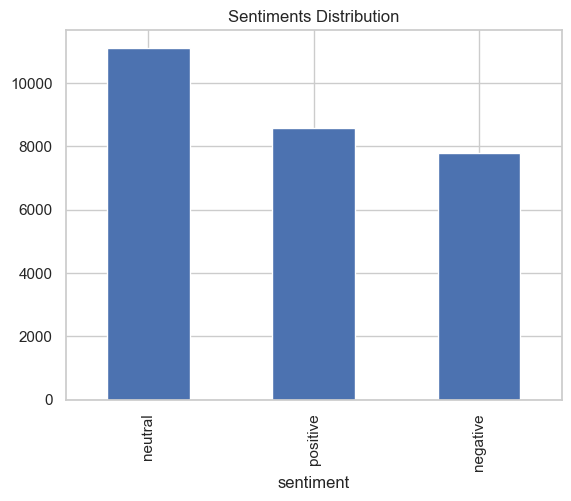

In [12]:
df.sentiment.value_counts().plot(kind="bar")
plt.title("Sentiments Distribution")
plt.show()

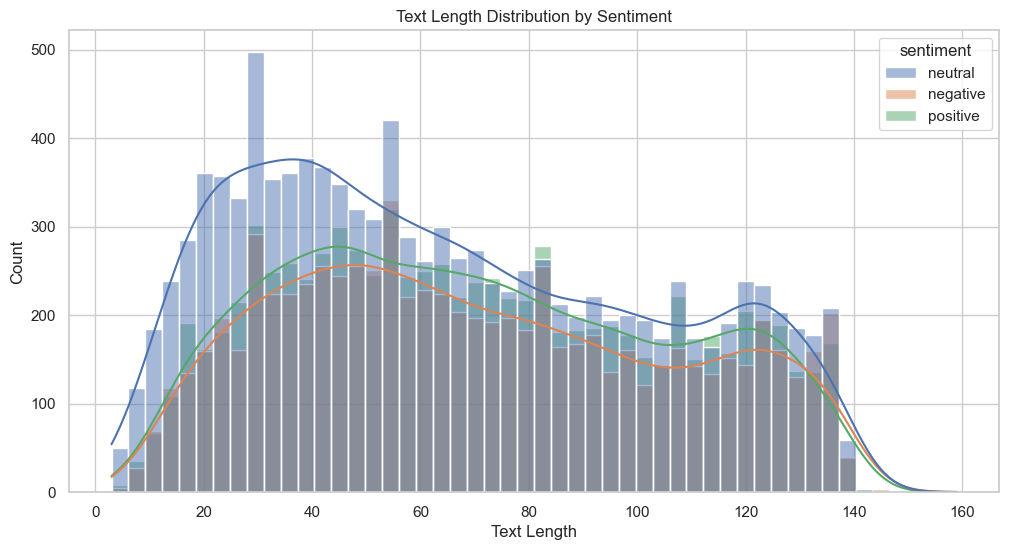

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='sentiment', bins=50, kde=True)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length')
plt.show()

In [14]:
import re
import string
def clean_text(text):
    """
    Clean and preprocess text data.
    
    Args:
        text (str): Input text
        
    Returns:
        str: Cleaned text
    """
    if pd.isna(text):
        return ""
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (keeping the text after #)
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [15]:
def preprocess_text(text):
    """
    Full preprocessing pipeline: clean, tokenize, remove stopwords, and lemmatize.
    
    Args:
        text (str): Input text
        
    Returns:
        str: Preprocessed text
    """
    if pd.isna(text):
        return ""
    text=clean_text(text)
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

In [16]:
df["Processed_Text"]=df["text"].apply(preprocess_text)

In [17]:
df.Processed_Text

0                                       id responded going
1                                  sooo sad miss san diego
2                                             bos bullying
3                                    interview leave alone
4                   son couldnt put release already bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    ive wondered rake client made clear net dont f...
27478    yay good enjoy break probably need hectic week...
27479                                                worth
27480                     flirting going atg smile yay hug
Name: Processed_Text, Length: 27480, dtype: object

In [18]:
for i in range(3):
    print(f"Original: {df.iloc[i]['text']}")
    print(f"Processed: {df.iloc[i]['Processed_Text']}")
    print("---")

Original:  I`d have responded, if I were going
Processed: id responded going
---
Original:  Sooo SAD I will miss you here in San Diego!!!
Processed: sooo sad miss san diego
---
Original: my boss is bullying me...
Processed: bos bullying
---


In [19]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),text_length,Processed_Text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,36,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,46,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,25,bos bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,31,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,75,son couldnt put release already bought


In [20]:
test_df=pd.read_csv("Data_Set/test.csv",encoding="latin1")

In [21]:
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [22]:
sentiment_mapping = {'negative': 0, 'neutral': 2, 'positive': 4}
if df["sentiment"].dtype=="object":
    df['sentiment_encoded'] =df['sentiment'].map(sentiment_mapping)
    test_df['sentiment_encoded'] = test_df['sentiment'].map(sentiment_mapping)
else:
    # If they're already numerical, just copy them
    df['sentiment_encoded'] =df['sentiment']
    test_df['sentiment_encoded'] = test_df['sentiment']
    
    

In [23]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),text_length,Processed_Text,sentiment_encoded
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,36,id responded going,2
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,46,sooo sad miss san diego,0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,25,bos bullying,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,31,interview leave alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,75,son couldnt put release already bought,0


In [52]:
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),sentiment_encoded
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,2.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,4.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,0.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,4.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,4.0


In [24]:
test_df["Processed_text"]=test_df["text"].apply(preprocess_text)

In [25]:
for i in range(3):
    print(f"Original: {test_df.iloc[i]['text']}")
    print(f"Processed: {test_df.iloc[i]['Processed_text']}")
    print("---")

Original: Last session of the day  http://twitpic.com/67ezh
Processed: last session day
---
Original:  Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).
Processed: shanghai also really exciting precisely skyscraper galore good tweeps china sh bj
---
Original: Recession hit Veronique Branquinho, she has to quit her company, such a shame!
Processed: recession hit veronique branquinho quit company shame
---


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df['Processed_Text'], 
    df['sentiment_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_encoded']
)

In [27]:
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 21984
Validation set size: 5496


In [29]:
def train_evaluate_model(model_name, vectorizer, classifier, X_train, y_train, X_val, y_val):
    # Create a pipeline
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    
    # Train the model
    print(f"Training {model_name}...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show() 
    return pipeline, accuracy

In [30]:
# Define vectorizers
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Define models to try
models = [
    ('Logistic Regression with Count Vectors', count_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Logistic Regression with TF-IDF', tfidf_vectorizer, LogisticRegression(max_iter=1000, C=1.0)),
    ('Naive Bayes with Count Vectors', count_vectorizer, MultinomialNB()),
    ('Naive Bayes with TF-IDF', tfidf_vectorizer, MultinomialNB()),
    ('Linear SVC with TF-IDF', tfidf_vectorizer, LinearSVC(max_iter=1000)),
    ('Random Forest with TF-IDF', tfidf_vectorizer, RandomForestClassifier(n_estimators=100))
]

Training Logistic Regression with Count Vectors...
Logistic Regression with Count Vectors Accuracy: 0.6830

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      1556
           2       0.62      0.72      0.67      2223
           4       0.76      0.70      0.73      1717

    accuracy                           0.68      5496
   macro avg       0.70      0.68      0.68      5496
weighted avg       0.69      0.68      0.68      5496



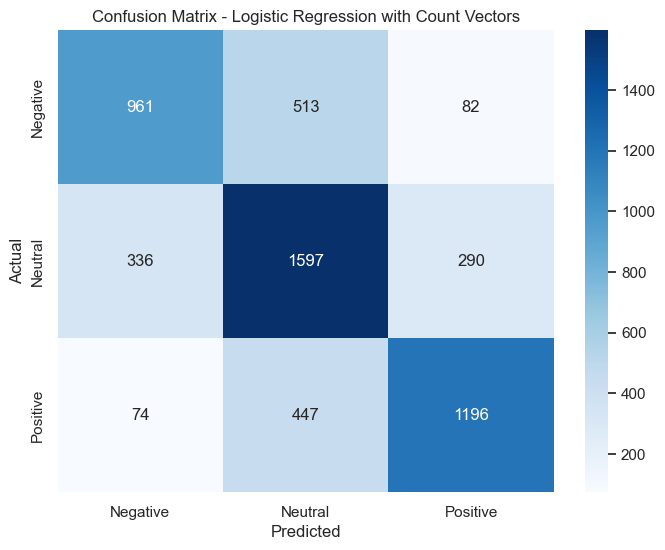

Training Logistic Regression with TF-IDF...
Logistic Regression with TF-IDF Accuracy: 0.6863

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      1556
           2       0.62      0.75      0.68      2223
           4       0.78      0.68      0.73      1717

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



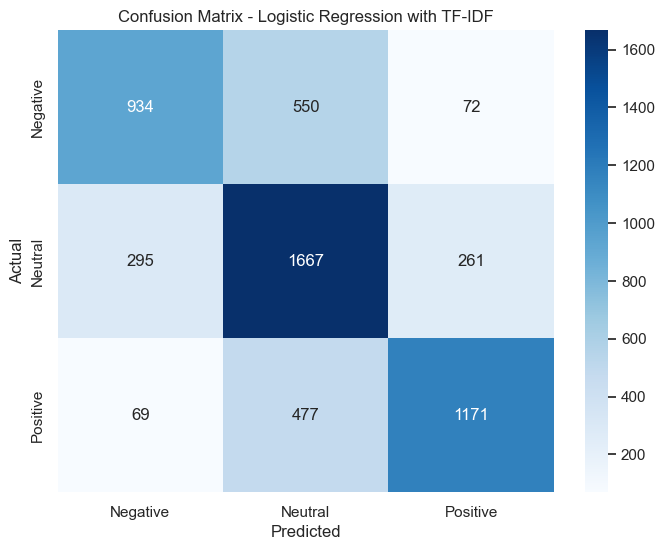

Training Naive Bayes with Count Vectors...
Naive Bayes with Count Vectors Accuracy: 0.6510

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1556
           2       0.60      0.66      0.63      2223
           4       0.71      0.67      0.69      1717

    accuracy                           0.65      5496
   macro avg       0.66      0.65      0.65      5496
weighted avg       0.65      0.65      0.65      5496



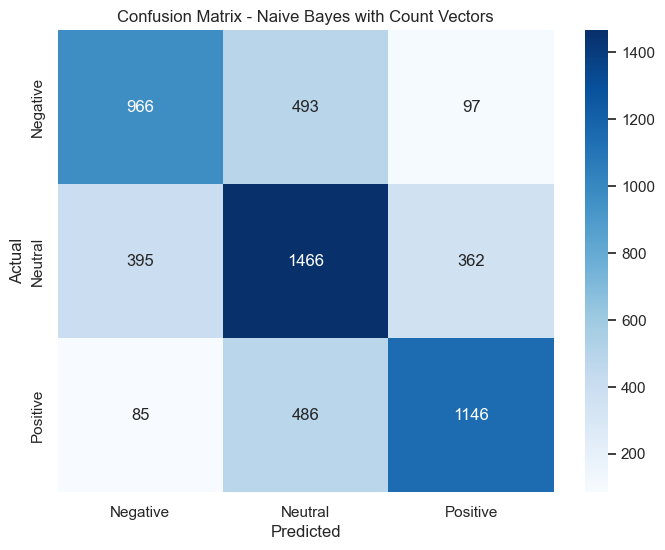

Training Naive Bayes with TF-IDF...
Naive Bayes with TF-IDF Accuracy: 0.6272

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.49      0.58      1556
           2       0.55      0.76      0.64      2223
           4       0.74      0.58      0.65      1717

    accuracy                           0.63      5496
   macro avg       0.67      0.61      0.62      5496
weighted avg       0.65      0.63      0.63      5496



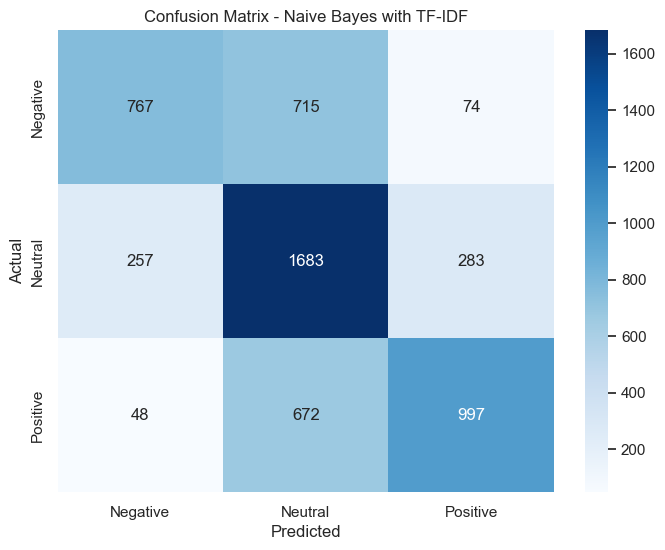

Training Linear SVC with TF-IDF...
Linear SVC with TF-IDF Accuracy: 0.6714

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1556
           2       0.63      0.69      0.65      2223
           4       0.74      0.69      0.71      1717

    accuracy                           0.67      5496
   macro avg       0.68      0.67      0.67      5496
weighted avg       0.67      0.67      0.67      5496



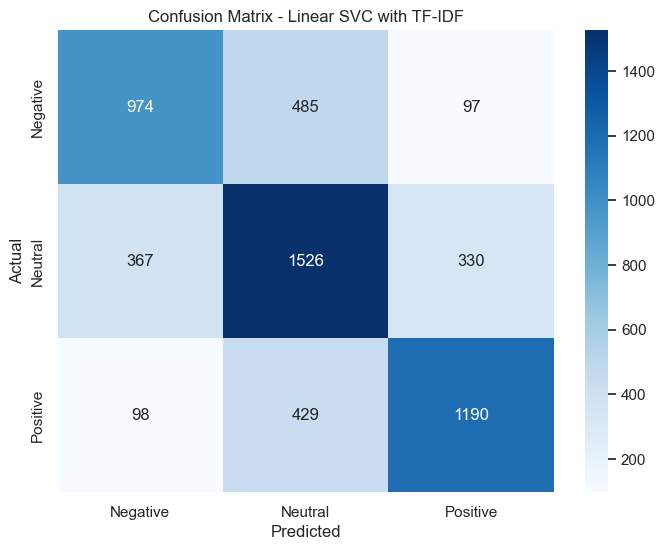

Training Random Forest with TF-IDF...
Random Forest with TF-IDF Accuracy: 0.6920

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1556
           2       0.64      0.71      0.68      2223
           4       0.74      0.75      0.74      1717

    accuracy                           0.69      5496
   macro avg       0.70      0.69      0.69      5496
weighted avg       0.69      0.69      0.69      5496



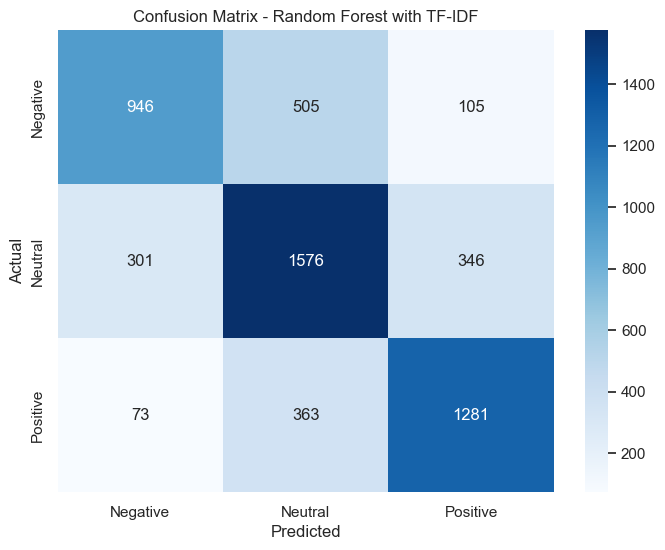

In [31]:
results = {}
for model_name, vectorizer, classifier in models:
    pipeline, accuracy = train_evaluate_model(
        model_name, vectorizer, classifier, X_train, y_train, X_val, y_val
    )
    results[model_name] = (pipeline, accuracy)

In [48]:
best_model_name = max(results.keys(), key=lambda k: results[k][1])
best_pipeline, best_accuracy = results[best_model_name]

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")


Best model: Random Forest with TF-IDF with accuracy: 0.6920


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
input_dim=5000
def build_nn_model(input_dim=5000):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))  # 3 classes
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # ✅ this fixes your shape error
        metrics=['accuracy']
    )
    return model



In [60]:
from scikeras.wrappers import KerasClassifier
vectorizer = TfidfVectorizer(max_features=5000)

# ✅ Wrap NN in KerasClassifier
classifier = KerasClassifier(
    model=build_nn_model,
    model__input_dim=5000,
    epochs=10,
    batch_size=2,
    verbose=1
)

Training Neural Network...
Epoch 1/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 129s 11ms/step - accuracy: 0.5904 - loss: 0.8763
Epoch 2/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 141s 11ms/step - accuracy: 0.7549 - loss: 0.6107
Epoch 3/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 128s 12ms/step - accuracy: 0.8082 - loss: 0.4969
Epoch 4/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 133s 12ms/step - accuracy: 0.8563 - loss: 0.3942
Epoch 5/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 134s 11ms/step - accuracy: 0.8944 - loss: 0.3035
Epoch 6/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 138s 11ms/step - accuracy: 0.9150 - loss: 0.2466
Epoch 7/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 139s 13ms/step - accuracy: 0.9310 - loss: 0.2003
Epoch 8/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 128s 12ms/step - accuracy: 0.9451 - loss: 0.1643
Epoch 9/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 130s 12ms/step - accuracy: 0.9489 - loss: 0.1490
Epoch 10/10
10992/10992 ━━━━━━━━━━━━━━━━━━━━ 138s 13ms/step - accuracy: 0.9581 - loss: 0.1300
2748/2748 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/ste

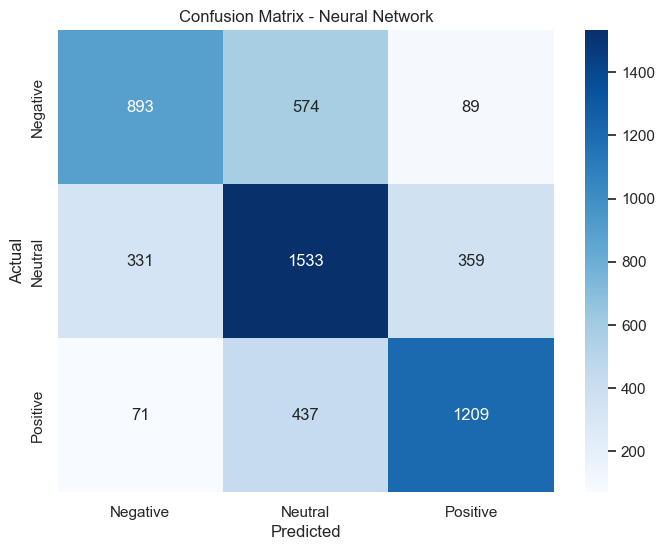

In [61]:
pipeline, acc = train_evaluate_model(
    "Neural Network",
    vectorizer,
    classifier,
    X_train, y_train, X_val, y_val
)